In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error

In [2]:

df = pd.read_csv("finaldata/US_Accidents_Dec21_updated.csv")       
df 

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


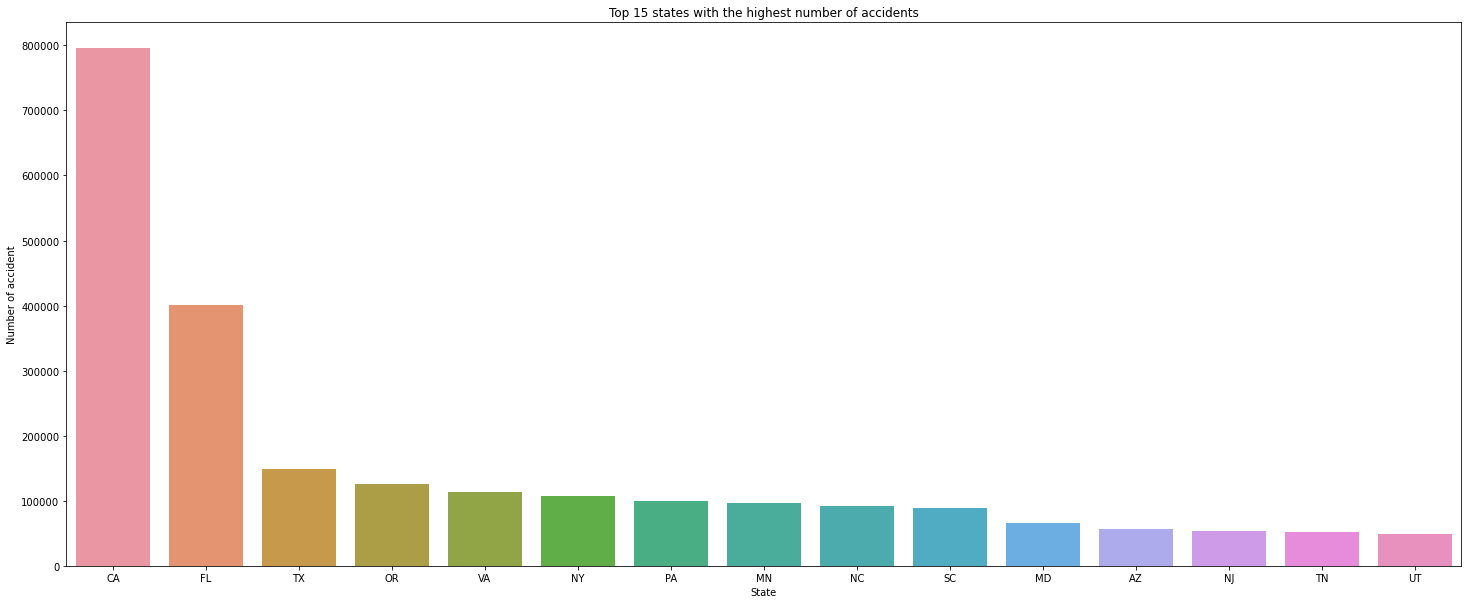

In [3]:
# https://www.kaggle.com/code/nihalgajbhiye/usa-car-accidents-severity-prediction#Dataset-import
states = df["State"].value_counts()
plt.figure(figsize=(25, 10))
plt.title("Top 15 states with the highest number of accidents")
sns.barplot(states[:15].index, states[:15].values)
plt.ylabel("Number of accident")
plt.xlabel("State")
plt.show()

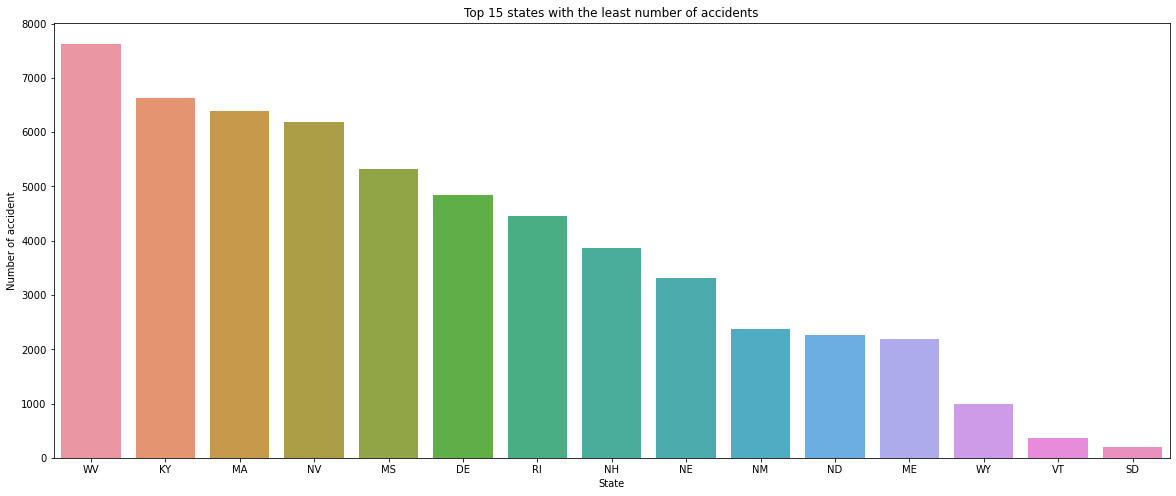

In [4]:
#least accidents by state

plt.figure(figsize=(20, 8))
plt.title("Top 15 states with the least number of accidents")
sns.barplot(states[-15:].index, states[-15:].values)
plt.ylabel("Number of accident")
plt.xlabel("State")
plt.show()

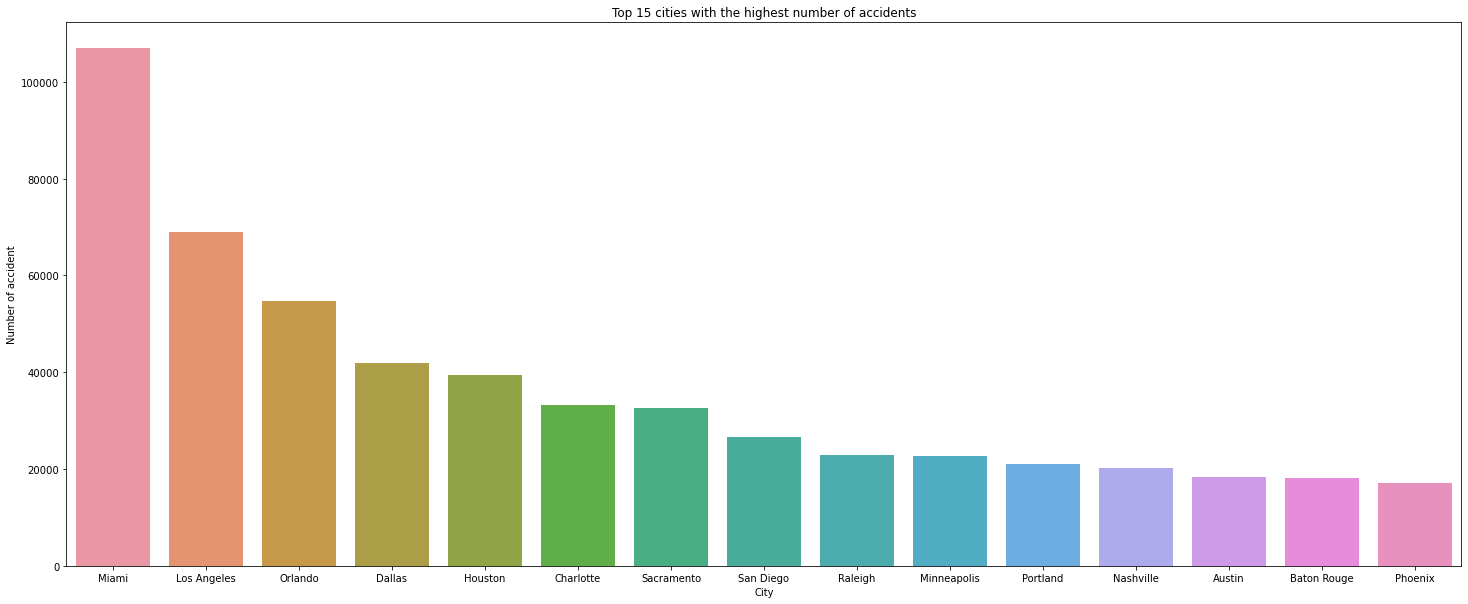

In [5]:
cities = df['City'].value_counts() 
plt.figure(figsize=(25, 10))
plt.title("Top 15 cities with the highest number of accidents")
sns.barplot(cities[:15].index, cities[:15].values)
plt.ylabel("Number of accident")
plt.xlabel("City")
plt.show()

In [6]:

#  create a dataframe of city and their corresponding accident cases
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})
timezone_df

,Timezone,Cases
0,US/Eastern,1221927
1,US/Pacific,967094
2,US/Central,488065
3,US/Mountain,164597


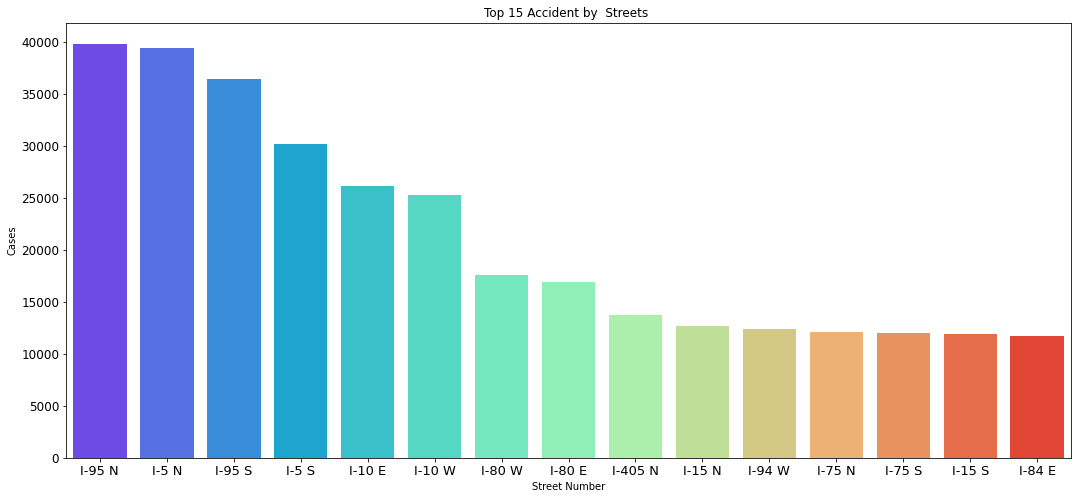

In [7]:
#street analysis

street = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street Number', 'Street':'Cases'})
top_street = pd.DataFrame(street.head(15))
plt.figure(figsize=(18,8))
plt.title('Top 15 Accident by  Streets ')
plt.xlabel('Street No.')
plt.ylabel('Accident Cases')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=top_street["Street Number"],y=top_street.Cases,palette="rainbow")
plt.show()

In [8]:

severity = pd.DataFrame(df['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity', 'Severity':'Cases'})
severity


,Severity,Cases
0,2,2532991
1,3,155105
2,4,131193
3,1,26053


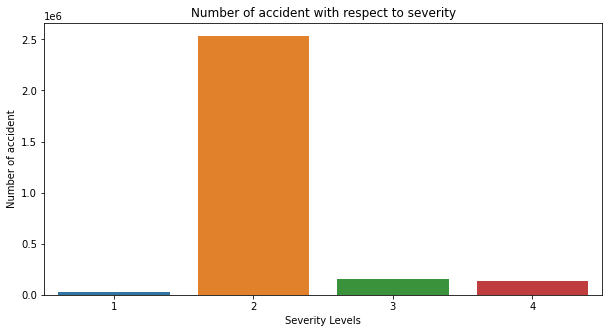

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Number of accident with respect to severity")
sns.barplot(severity["Severity"], severity["Cases"])
plt.ylabel("Number of accident")
plt.xlabel("Severity Levels")
plt.show()

In [10]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

<AxesSubplot:label='97ab7e28-173d-4463-b998-dc0cb207eb92', xlabel='Duration', ylabel='Cases'>

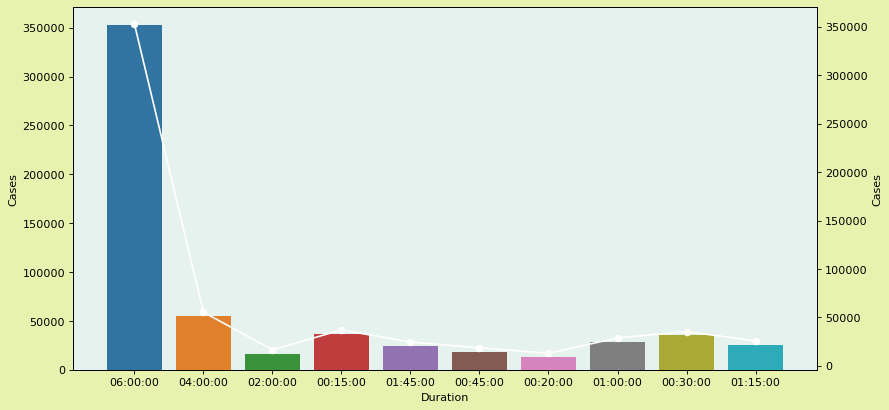

In [11]:
# https://www.kaggle.com/code/satyabrataroy/60-insights-extraction-us-accident-analysis/notebook # this link  helped o see duration 
#ACCIDENT TIME ANALYSIS by duration in a day 
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ad')

ax=sns.barplot(y=top_10_accident_duration_df['Cases'], x=top_10_accident_duration_df['Duration'])
ax1 = ax.twinx()
sns.lineplot(data = top_10_accident_duration_df, marker='o', x='Duration', y='Cases', color = 'white', alpha = 1)

In [12]:
#YEAR ANALYSIS
years = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

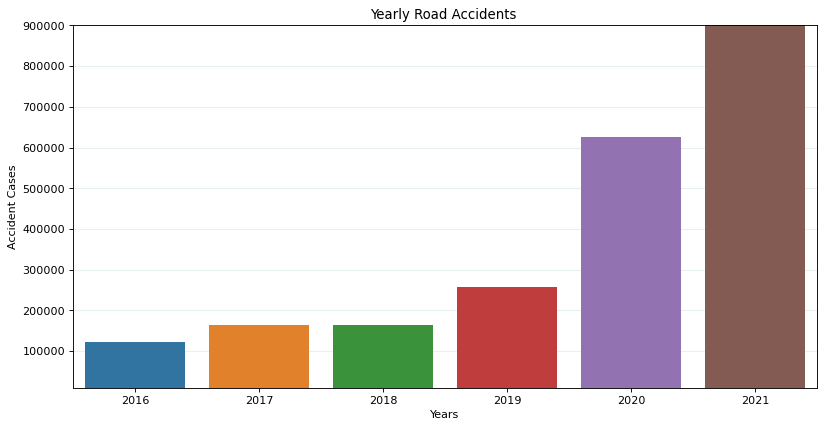

In [13]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=years['Cases'], x=years['Year'])

plt.ylim(10000, 900000)
plt.title('Yearly Road Accidents ')
plt.ylabel('Accident Cases')
plt.xlabel('Years')



ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=0.3)

plt.show()

In [14]:
#month analysis
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')

month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

(0.0, 550000.0)

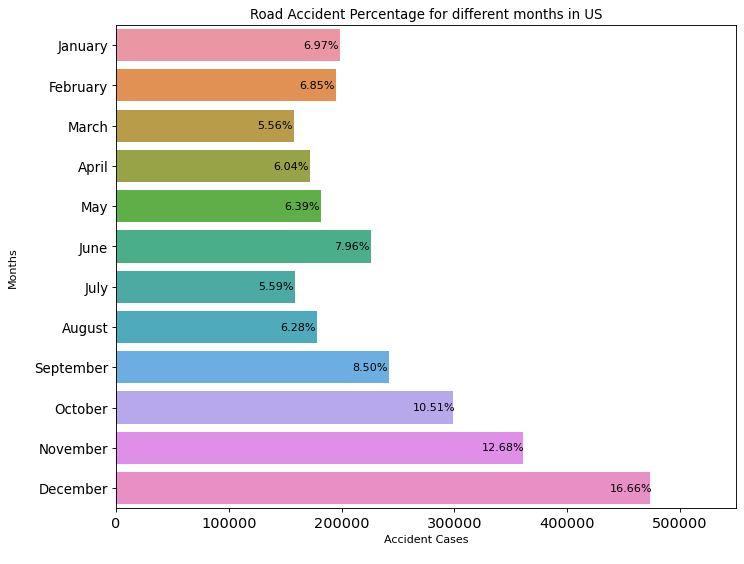

In [15]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)

ax=sns.barplot(x=month_df['Cases'], y=month_df['Month'])

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()-17000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center')

plt.title('Road Accident Percentage for different months in US')
plt.xlabel('Accident Cases\n')
plt.ylabel('Months\n')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 550000)

Text(0.5, 0, '\nDay of the Week\n')

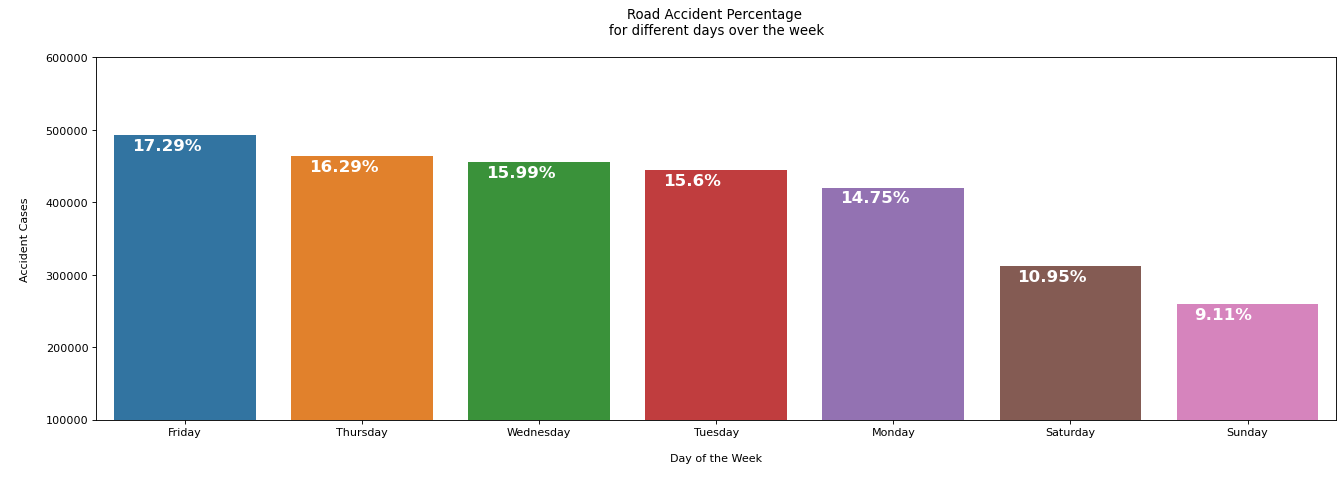

In [16]:
#day analysis
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})
fig, ax = plt.subplots(figsize = (20,6), dpi = 80)

ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(100000, 600000)
plt.title('Road Accident Percentage \nfor different days over the week\n')
plt.ylabel('\nAccident Cases\n')
plt.xlabel('\nDay of the Week\n')


Text(0.5, 0, '\nDay of the Week\n')

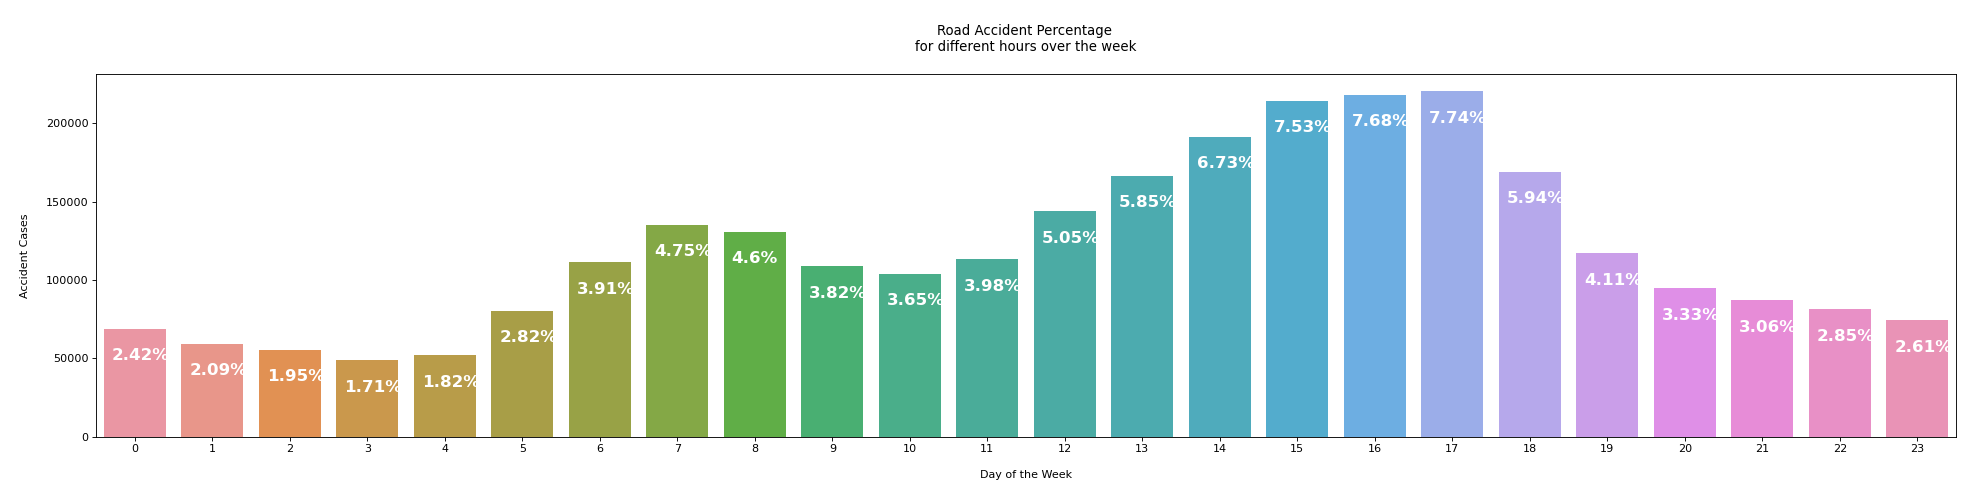

In [17]:
#hour analysis
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')
fig, ax = plt.subplots(figsize = (30,6), dpi = 80)

ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')


plt.title('\nRoad Accident Percentage \nfor different hours over the week\n')
plt.ylabel('\nAccident Cases\n')
plt.xlabel('\nDay of the Week\n')

In [18]:

saturday = df[df['Start_Time'].dt.dayofweek == 5]
sunday = df[df['Start_Time'].dt.dayofweek == 6]


Text(0.5, 0, '\nDay of the Week\n')

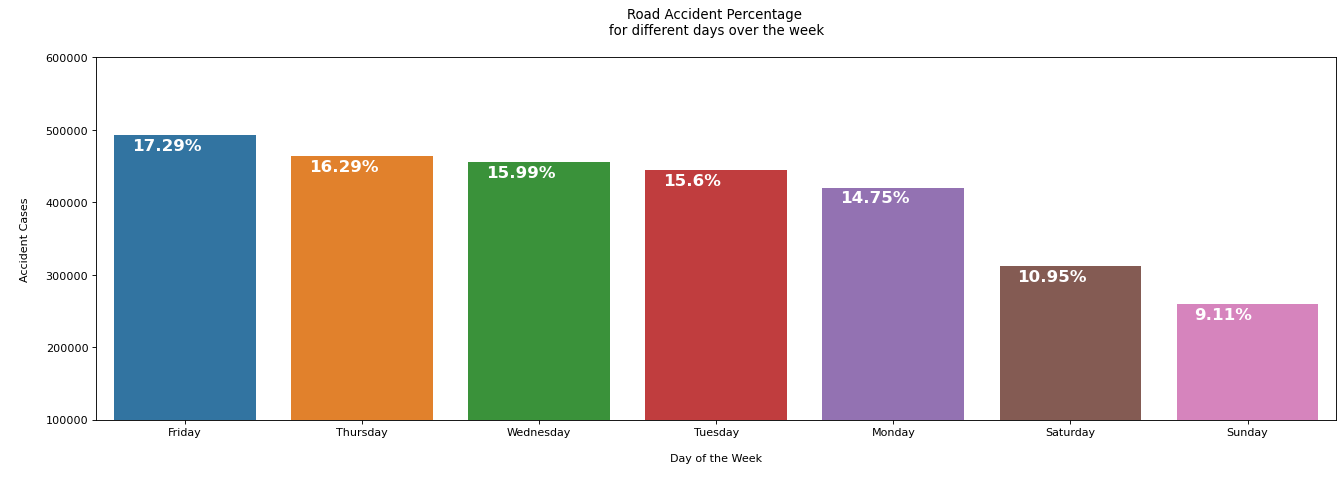

In [19]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})
fig, ax = plt.subplots(figsize = (20,6), dpi = 80)

ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(100000, 600000)
plt.title('Road Accident Percentage \nfor different days over the week\n')
plt.ylabel('\nAccident Cases\n')
plt.xlabel('\nDay of the Week\n')

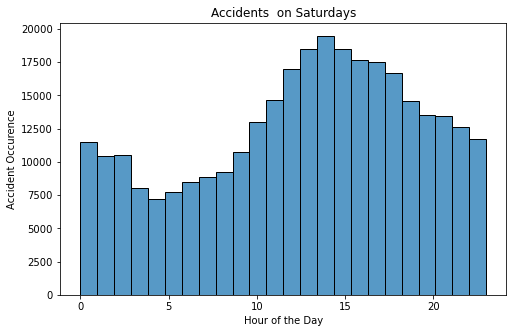

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(saturday['Start_Time'].dt.hour, bins = 24)
total = df.shape[0]

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents  on Saturdays')

plt.show()


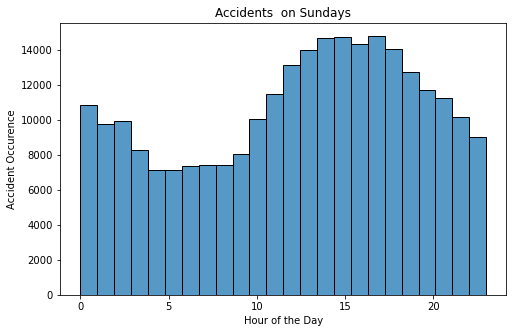

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(sunday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents  on Sundays')

plt.show()

Text(0.5, 1.0, 'Accidents Occurence by Month in 2020')

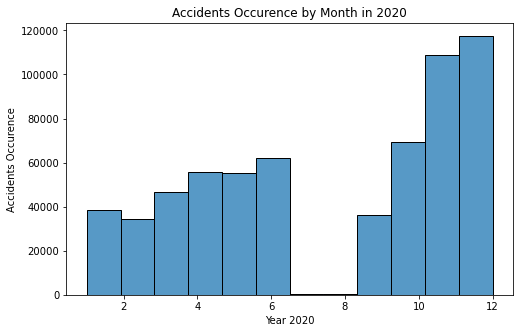

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
dt_2020 = df[df['Start_Time'].dt.year==2020]
sns.histplot(dt_2020['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2020")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2020')

Text(0.5, 1.0, 'Accidents Occurence by Month in 2016')

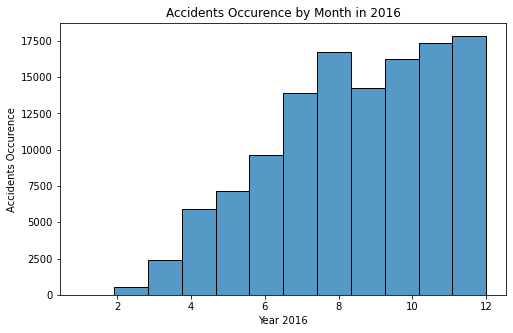

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
dt_2020 = df[df['Start_Time'].dt.year==2016]
sns.histplot(dt_2020['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2016")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2016')

In [24]:
# Weather conditions at time of occurence sorted and filtered to top 20

weather_conditions = df.groupby(['Weather_Condition']).count()['ID']
weather_conditions.sort_values(ascending=False)[:20]

Weather_Condition
Fair                       1107194
Mostly Cloudy               363959
Cloudy                      348767
Partly Cloudy               249939
Clear                       173823
Light Rain                  128403
Overcast                     84882
Scattered Clouds             45132
Light Snow                   43752
Fog                          41226
Haze                         36354
Rain                         31044
Fair / Windy                 15195
Heavy Rain                   11824
Smoke                         7200
Light Drizzle                 7041
Thunder in the Vicinity       6944
Cloudy / Windy                6839
T-Storm                       6546
Mostly Cloudy / Windy         6297
Name: ID, dtype: int64

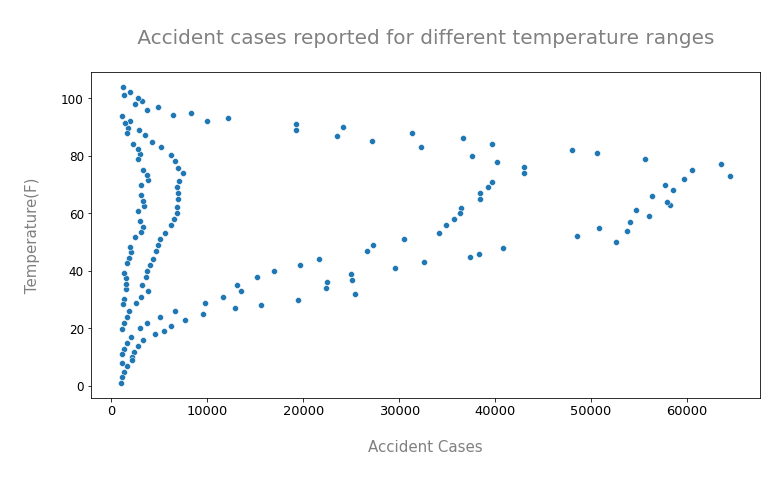

In [25]:

#TEMPERTURE
temp = pd.DataFrame(df["Temperature(F)"].value_counts()).reset_index().rename(columns={"index":"Temp","Temperature(F)":"Cases"})
plt.figure(figsize=(12,6))
plt.title('\n Accident cases reported for different temperature ranges \n', size=20, color='grey')
plt.ylabel('\n Temperature(F) \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=temp.Cases[temp.Cases>1000],y=temp.Temp)


plt.show()

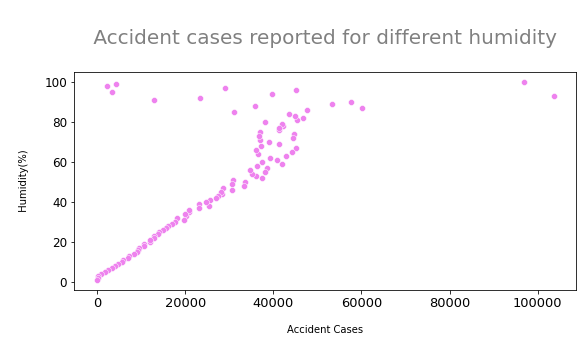

In [26]:
#Humidity
humid = pd.DataFrame(df["Humidity(%)"].value_counts()).reset_index().rename(columns={"index":"Humidity","Humidity(%)":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different humidity \n', size=20, color='grey')
plt.ylabel('\n Humidity(%) \n')
plt.xlabel('\nAccident Cases\n')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=humid.Cases,y=humid.Humidity,color="violet")

plt.show()

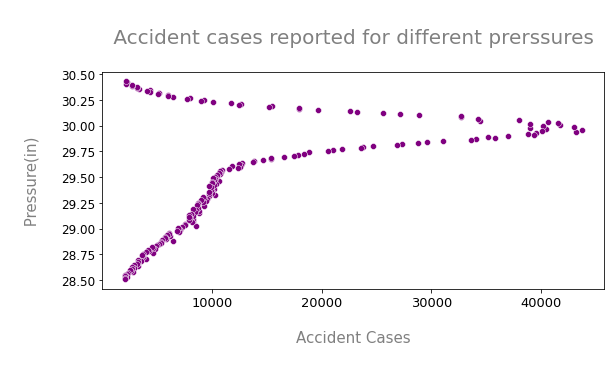

In [27]:
#pressure
pressure = pd.DataFrame(df["Pressure(in)"].value_counts()).reset_index().rename(columns={"index":"Pressure","Pressure(in)":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different prerssures \n', size=20, color='grey')
plt.ylabel('\n Pressure(in) \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=pressure.Cases[pressure.Cases>2000],y=pressure.Pressure,color="purple")

plt.show()

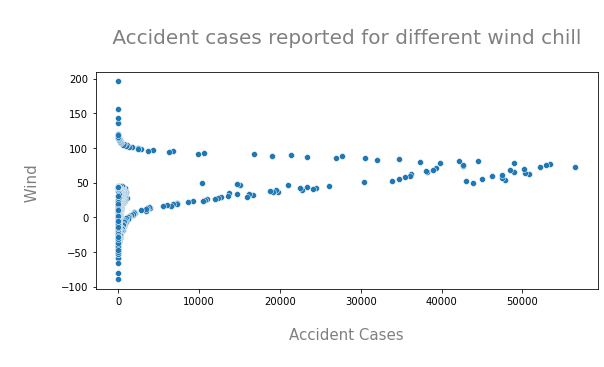

In [28]:
#wind chill
wind = pd.DataFrame(df["Wind_Chill(F)"].value_counts()).reset_index().rename(columns={"index":"Wind_Chill","Wind_Chill(F)":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different wind chill \n', size=20, color='grey')
plt.ylabel('\n Wind  \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')

a = sns.scatterplot(x=wind.Cases,y=wind.Wind_Chill)

plt.show()

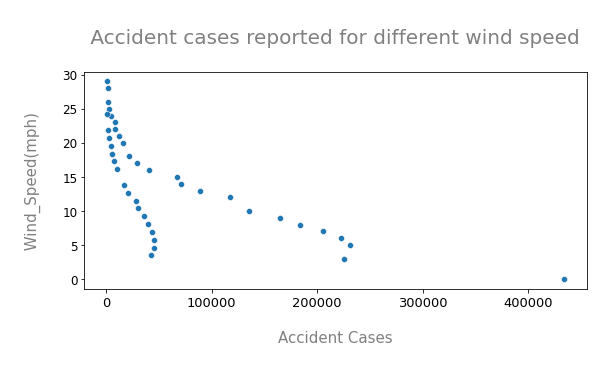

In [29]:
#wind speed
wind = pd.DataFrame(df["Wind_Speed(mph)"].value_counts()).reset_index().rename(columns={"index":"Wind_Speed","Wind_Speed(mph)":"Cases"})
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported for different wind speed \n', size=20, color='grey')
plt.ylabel('\n Wind_Speed(mph) \n', fontsize=15, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=wind.Cases[wind.Cases>1000],y=wind.Wind_Speed[wind.Wind_Speed<50])

plt.show()

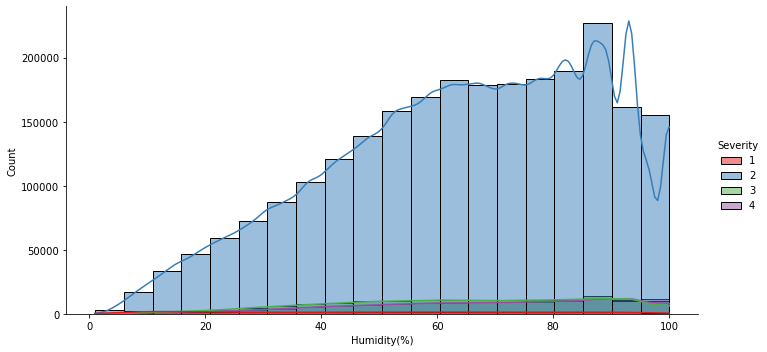

In [30]:
sns.displot(df, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)

In [31]:
l = df.iloc[:, 29:43]
l.head()

,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False
3,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Traffic_Signal')

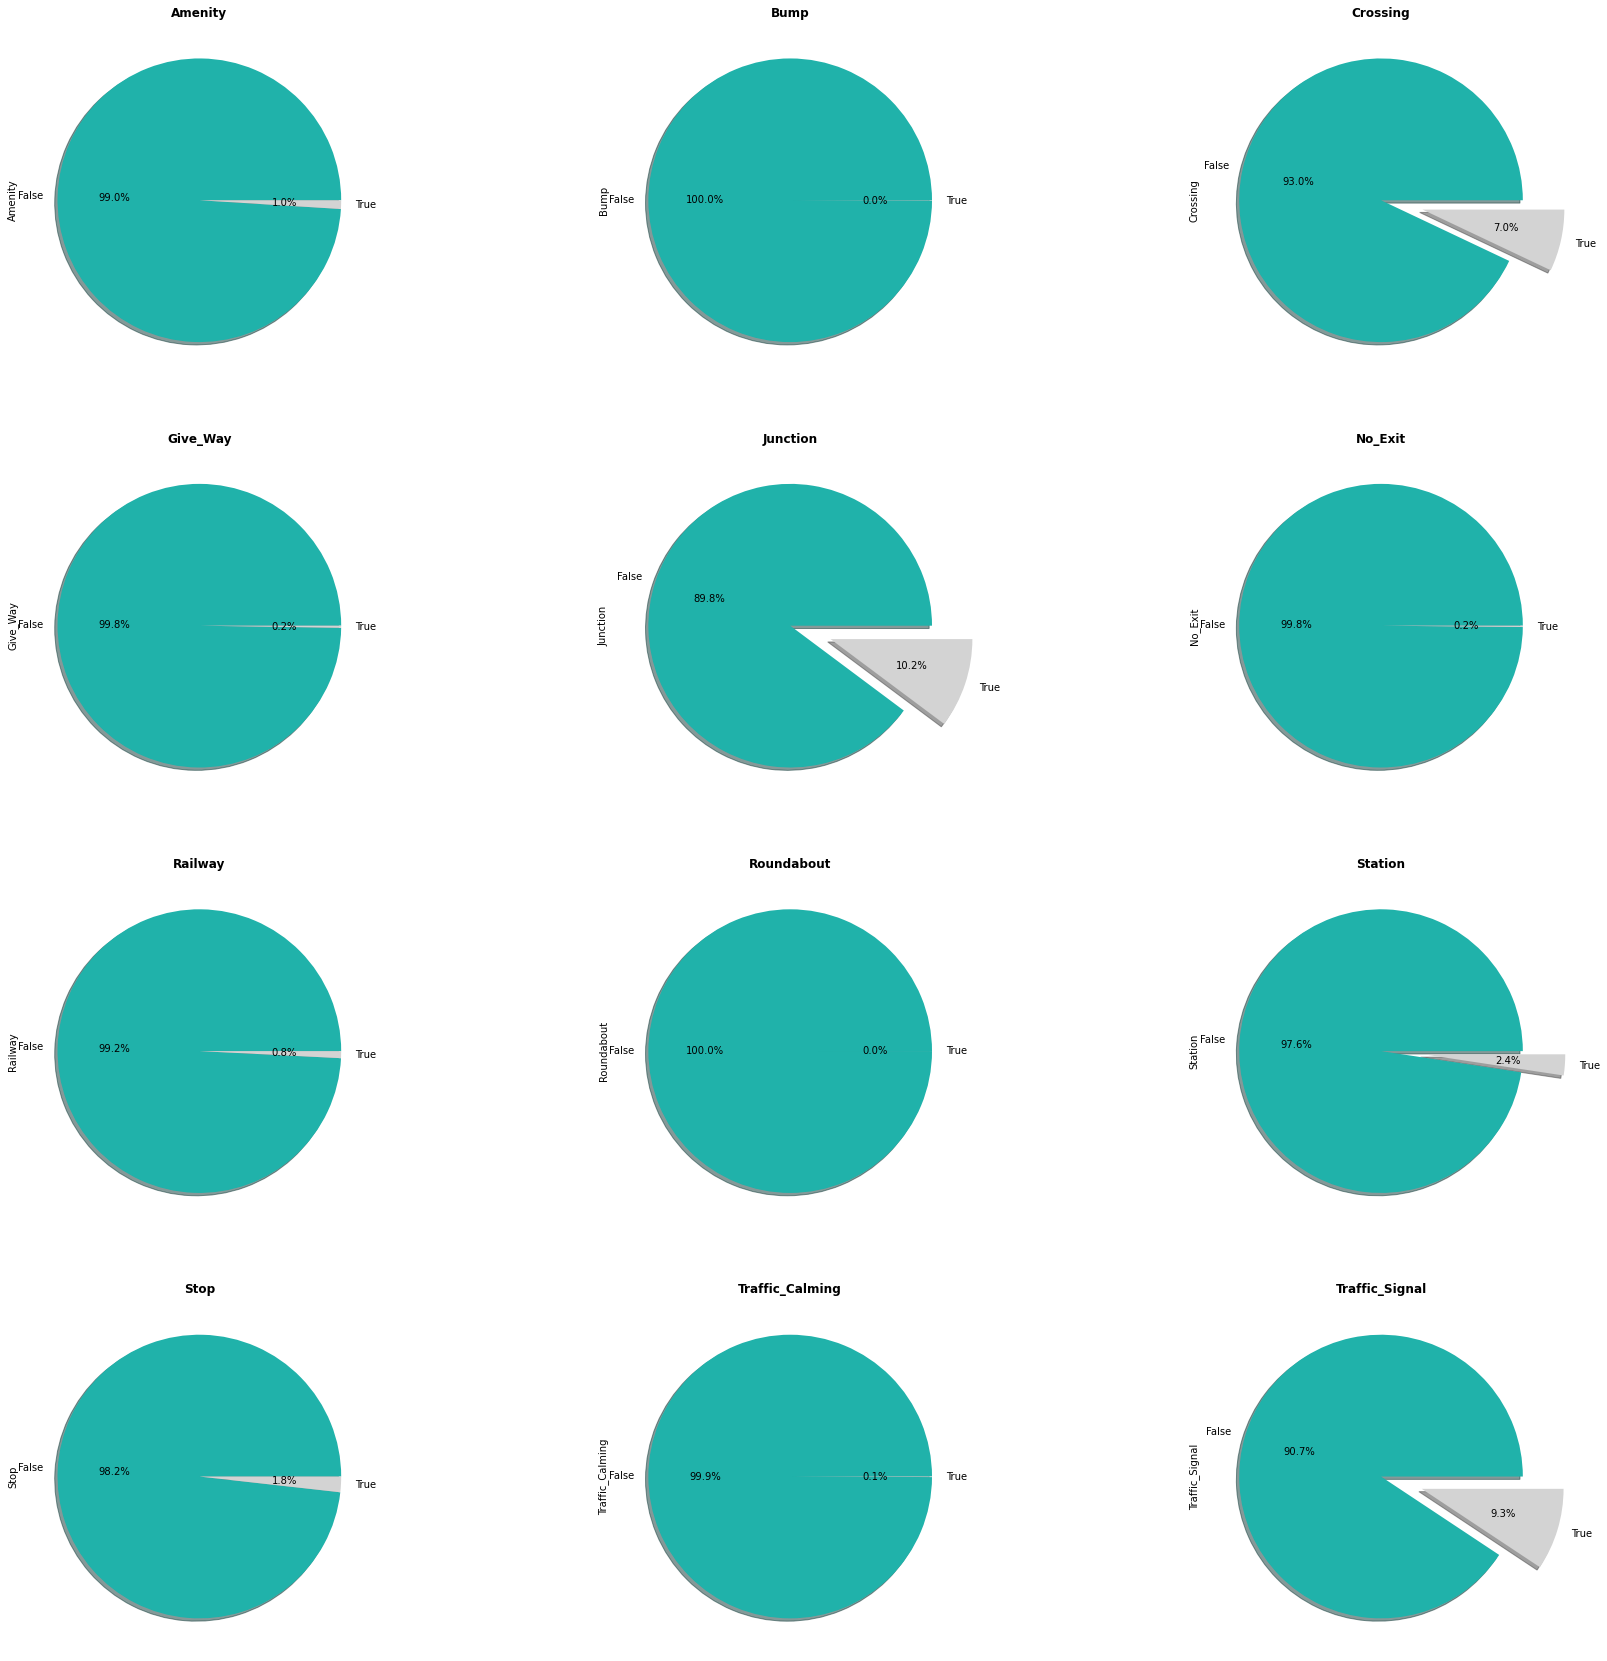

In [32]:

# https://www.kaggle.com/code/prajwal670/us-accidents-eda helped to achieve this result
f,ax=plt.subplots(4,3,figsize=(30,30))
explode = [0,0.3]

ax[0,0] = l['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],colors=["lightseagreen","lightgray"],shadow = True)
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = l['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],colors=["lightseagreen","lightgray"],shadow = True)
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = l['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],colors=["lightseagreen","lightgray"],explode=explode,shadow = True)
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = l['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],colors=["lightseagreen","lightgray"],shadow = True)
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = l['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],colors=["lightseagreen","lightgray"],explode=explode,shadow = True)
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = l['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],colors=["lightseagreen","lightgray"],shadow = True)
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = l['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],colors=["lightseagreen","lightgray"],shadow = True)
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = l['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],colors=["lightseagreen","lightgray"],shadow = True)
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = l['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],colors=["lightseagreen","lightgray"],explode=explode,shadow = True)
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = l['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],colors=["lightseagreen","lightgray"],shadow = True)
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = l['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],colors=["lightseagreen","lightgray"],shadow = True)
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = l['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],colors=["lightseagreen","lightgray"],explode=explode,shadow = True)
ax[3,2].set_title("Traffic_Signal",fontweight ="bold")